In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CyRK import __version__, nbsolve_ivp, pysolve_ivp
from CyRK.cy.cysolver_test import cytester 

from performance import diffeqs
del diffeqs['Lorenz-ExtraOut']

## CyRK - pysolve_ivp

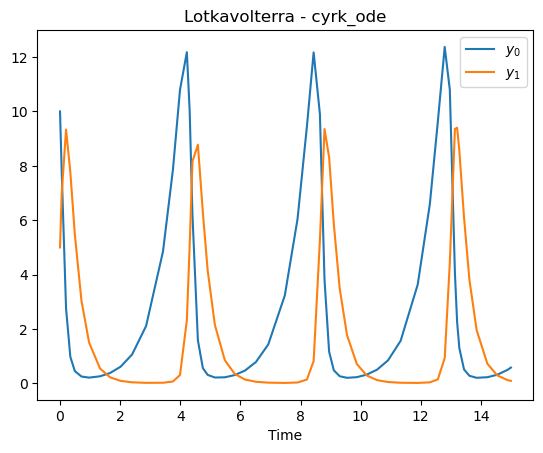

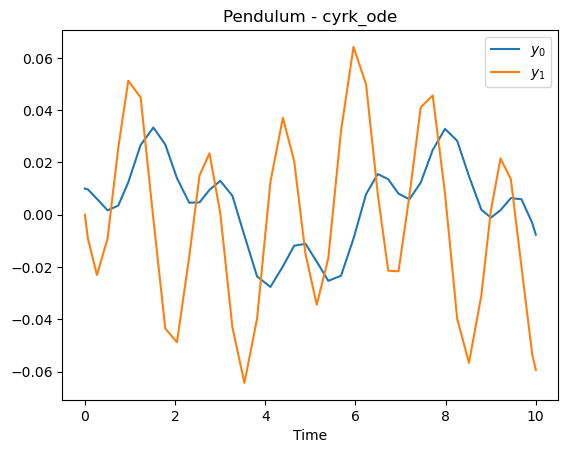

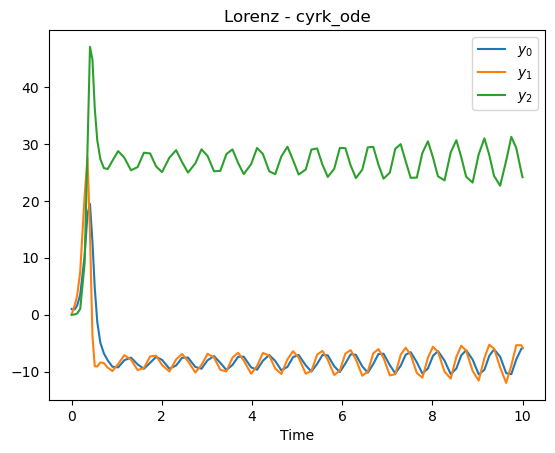

In [2]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    result = pysolve_ivp(cy_diffeq, time_span, y0, args=args_, method='RK45', pass_dy_as_arg=True)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - pysolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    

## CyRK - CySolver

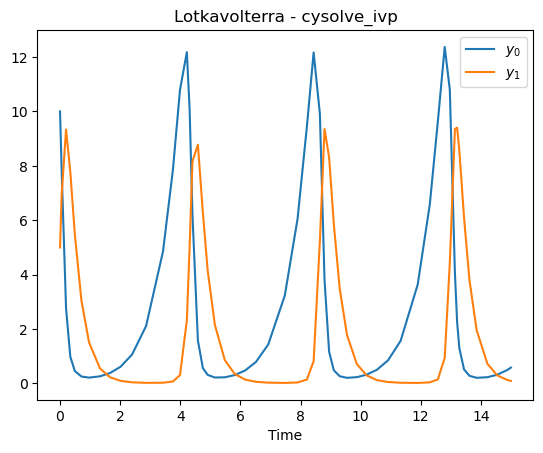

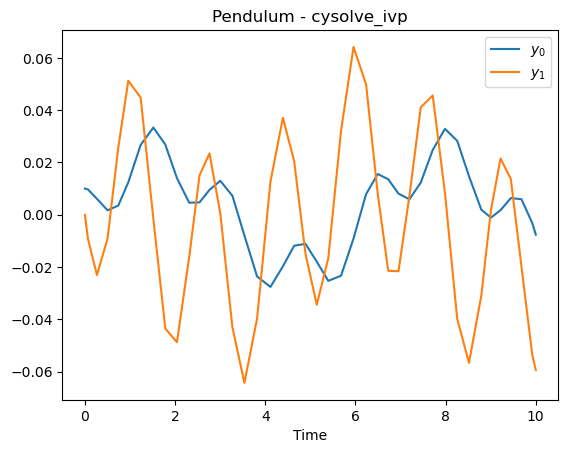

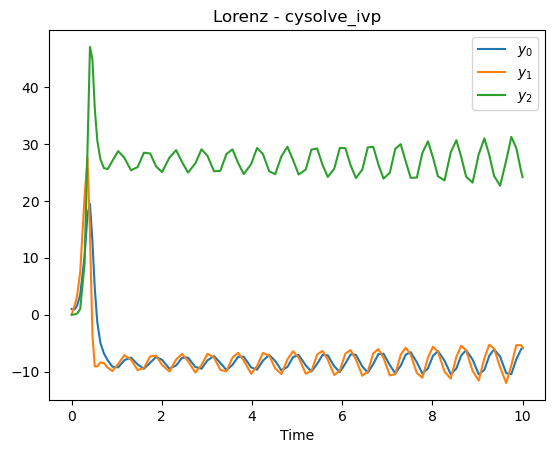

In [7]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    result = cytester(CySolverDiffeqInt, time_span, y0, args=np.asarray(args_), method=1)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - cysolve_ivp', xlabel='Time')
    ax.legend(loc='best')

## CyRK - nbsolve_ivp

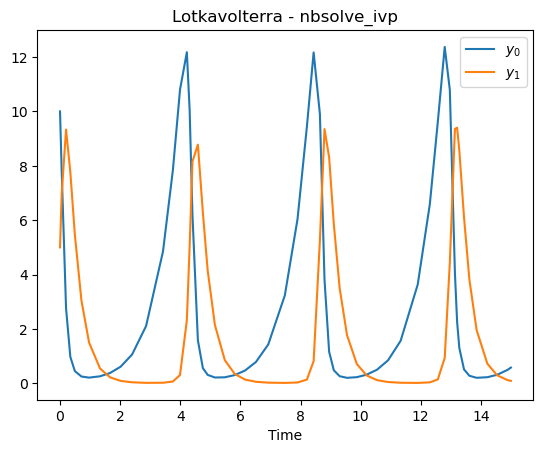

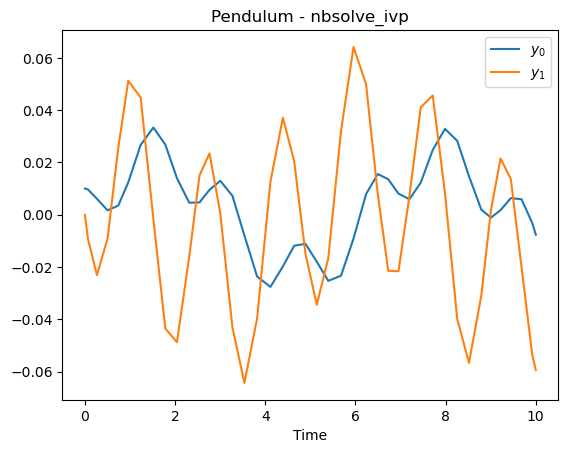

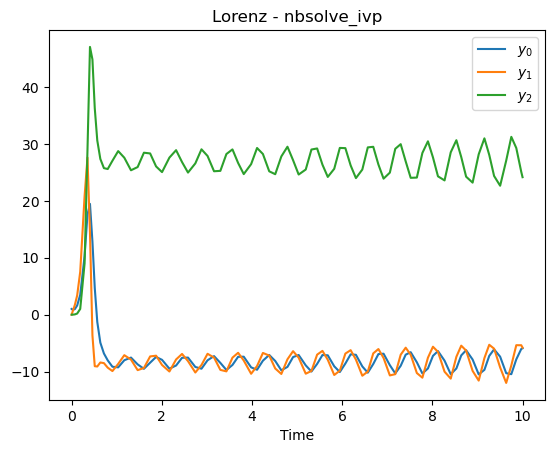

In [9]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
    
    time_span = timespans[0]
    result = nbsolve_ivp(nb_diffeq, time_span, y0, args_, rk_method=1)
    y_len = result.num_y
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - nbsolve_ivp', xlabel='Time')
    ax.legend(loc='best')